# Proizvodnja iz TE i HE  - satni podaci

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_2019=pd.read_csv(r"FILES\ELEKT\Actual Generation per Production Type_2019.csv")
file_2020=pd.read_csv(r"FILES\ELEKT\Actual Generation per Production Type_2020.csv")
file_2021=pd.read_csv(r"FILES\ELEKT\Actual Generation per Production Type_2021.csv")

# Termoelektrane

In [3]:
file_2019.head(3)

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,Bosnia and Herz. (BA),01.01.2019 00:00 - 01.01.2019 01:00 (CET),NaN,0.0,NaN,NaN,568.0,NaN,NaN,NaN,...,NaN,252.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,53.0
1,Bosnia and Herz. (BA),01.01.2019 01:00 - 01.01.2019 02:00 (CET),NaN,0.0,NaN,NaN,547.0,NaN,NaN,NaN,...,NaN,183.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,53.0
2,Bosnia and Herz. (BA),01.01.2019 02:00 - 01.01.2019 03:00 (CET),NaN,0.0,NaN,NaN,533.0,NaN,NaN,NaN,...,NaN,161.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,53.0


<AxesSubplot:>

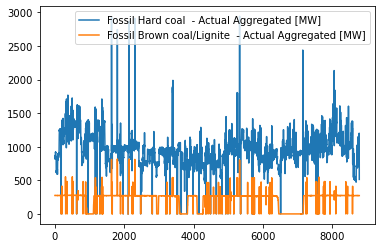

In [4]:
file_2020[['Fossil Hard coal  - Actual Aggregated [MW]','Fossil Brown coal/Lignite  - Actual Aggregated [MW]']].plot()

In [5]:
file_2019['Fossil coal  - Actual Aggregated [MW]']=pd.to_numeric(file_2019.loc[:,['Fossil Hard coal  - Actual Aggregated [MW]','Fossil Brown coal/Lignite  - Actual Aggregated [MW]']].sum(axis=1))
file_2020['Fossil coal  - Actual Aggregated [MW]']=pd.to_numeric(file_2020.loc[:,['Fossil Hard coal  - Actual Aggregated [MW]','Fossil Brown coal/Lignite  - Actual Aggregated [MW]']].sum(axis=1))
file_2021['Fossil coal  - Actual Aggregated [MW]']=pd.to_numeric(file_2021.loc[:,['Fossil Hard coal  - Actual Aggregated [MW]','Fossil Brown coal/Lignite  - Actual Aggregated [MW]']].sum(axis=1))

In [6]:
file_2020['Fossil coal  - Actual Aggregated [MW]'].min()

0.0

In [7]:
file_2021['Fossil coal  - Actual Aggregated [MW]'].min()

0.0

In [8]:
file_2019=file_2019.assign(Timestamp=pd.date_range("2019-01-01 00:00:00","2020-01-01", freq="1H"))
file_2020=file_2020.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2021-01-01", freq="1H"))
file_2021=file_2021.assign(Timestamp=pd.date_range("2021-01-01 00:00:00","2022-01-01", freq="1H"))

In [9]:
#file=file.set_index(file['Timestamp'].astype('datetime64[ns]'))
file_2019["Month"],file_2020["Month"],file_2021["Month"]=file_2019["Timestamp"].dt.month,file_2020["Timestamp"].dt.month,file_2021["Timestamp"].dt.month
file_2019["Year"],file_2020["Year"],file_2021["Year"]=file_2019["Timestamp"].dt.year,file_2020["Timestamp"].dt.year,file_2021["Timestamp"].dt.year

### CHP elektrane

CHP elektrane u BiH su TE Kakanj i TE Tuzla. U TE Tuzla mogućnost CHP rada imaju blokovi: Blok 3 i Blok 4, sa po 69 MW i 174 MW respektivno raspoložive snage za električnu energiju, a 4 MW i 13 MW raspoloživo za toplotnu energiju. U TE Kakanj blokovi: Blok 5 i Blok 6 imaju po 100 MW raspoloživih za električnu energiju, odnosno po 30 MW raspoloživih za toplotnu energiju. Blok 7 ima raspoloživih 208 MW za električnu, odnosno 3 MW za toplotnu energiju. U dokumentaciji je naveden kao blok kondenzacijskog tipa te će se tako i posmatrati.

Ukupna snaga na mreži prenosa za TE Kakanj je 408 MW a za TE Tuzla je 650 MW.

CHP blokovi - raspoloživa snaga: 
<br>(69+174+100+100)= 443 MW - električna energija
<br>(4+13+30+30+3)= 80MW - toplotna energija

Snaga na mreži prenosa ostali, kondenzacijskih elektrana je 830 MW, s tim da je dodato i 2,11 MW snage jedne od industrijskih elektrana, te ta snaga iznosi 832,11 MW.

In [10]:
# CHP elektrane
file_KA_2020=pd.read_excel(r"FILES\ELEKT\TE_KA_2020.xlsx")
file_TZ_2020=pd.read_excel(r"FILES\ELEKT\TE_tz_2020.xlsx")

file_KA_2019=pd.read_excel(r"FILES\ELEKT\TE_KA_2019.xlsx")
file_TZ_2019=pd.read_excel(r"FILES\ELEKT\TE_tz_2019.xlsx")

In [11]:
file_KA_2020.columns

Index(['Unnamed: 0', 'sat', 'B5 generator', 'B5 prag, MWh/h', 'B5 Q,(MVArh/h)',
       'B5 U,(kV)', 'B6 generator', 'B6 prag, MWh/h', 'B6 Q,(MVArh/h)',
       'B6 U,(kV)', 'B7 generator', 'B7 prag, MWh/h', 'B7 Q,(MVArh/h)',
       'B7 U,(kV)', 'Vl.potr P, MWh/h', 'Vl.potr Q,(MVArh/h)',
       'TE_KA generator', 'TE_KA prag, MWh/h', 'TE_KA Q * (MVArh/h)'],
      dtype='object')

Blok 5 u TE Kakanj bilježi "negativnu" snagu na pragu u pojedinim momentima, te će se te vrijednosti zamijeniti sa nulom.

In [12]:
file_KA_2019.loc[file_KA_2019['B5 prag, MWh/h']<0,'B5 prag, MWh/h']=0
file_KA_2020.loc[file_KA_2020['B5 prag, MWh/h']<0,'B5 prag, MWh/h']=0

Anomalije:

In [13]:
file_KA_2019[file_KA_2019['B5 prag, MWh/h']>=100]

,Unnamed: 0,sat,B5 generator,"B5 prag, MWh/h","B5 Q,(MVArh/h)","B5 U,(kV)",B6 generator,"B6 prag, MWh/h","B6 Q,(MVArh/h)","B6 U,(kV)",B7 generator,"B7 prag, MWh/h","B7 Q,(MVArh/h)","B7 U,(kV)","Vl.potr P, MWh/h","Vl.potr Q,(MVArh/h)",TE_KA generator,"TE_KA prag, MWh/h",TE_KA Q * (MVArh/h)
7202,7202,3,194.0,179.0,0.0,124.0,0.0,0.0,0.0,0.0,0,0.0,0.0,252.0,10.78,44.89,194.0,167.0,-44.89


In [14]:
file_KA_2020[file_KA_2020['B5 prag, MWh/h']>=100]

,Unnamed: 0,sat,B5 generator,"B5 prag, MWh/h","B5 Q,(MVArh/h)","B5 U,(kV)",B6 generator,"B6 prag, MWh/h","B6 Q,(MVArh/h)","B6 U,(kV)",B7 generator,"B7 prag, MWh/h","B7 Q,(MVArh/h)","B7 U,(kV)","Vl.potr P, MWh/h","Vl.potr Q,(MVArh/h)",TE_KA generator,"TE_KA prag, MWh/h",TE_KA Q * (MVArh/h)
4367,4367,24,98.65,100.31,21.12,119.0,100.31,91.78,9.5,119.0,210.0,188.32,0.0,242.0,7.65,36.19,408.96,372.76,-5.57


In [15]:
file_KA_2020[file_KA_2020['B6 prag, MWh/h']>=100]

,Unnamed: 0,sat,B5 generator,"B5 prag, MWh/h","B5 Q,(MVArh/h)","B5 U,(kV)",B6 generator,"B6 prag, MWh/h","B6 Q,(MVArh/h)","B6 U,(kV)",B7 generator,"B7 prag, MWh/h","B7 Q,(MVArh/h)","B7 U,(kV)","Vl.potr P, MWh/h","Vl.potr Q,(MVArh/h)",TE_KA generator,"TE_KA prag, MWh/h",TE_KA Q * (MVArh/h)
7154,7154,3,0.0,0.0,0.0,0.0,180.7,165.0,2.55,120.0,361.2,325.6,0.0,244.0,14.03,55.92,541.9,476.57,-53.37


In [16]:
file_KA_2020[file_KA_2020['B7 prag, MWh/h']>=230]

,Unnamed: 0,sat,B5 generator,"B5 prag, MWh/h","B5 Q,(MVArh/h)","B5 U,(kV)",B6 generator,"B6 prag, MWh/h","B6 Q,(MVArh/h)","B6 U,(kV)",B7 generator,"B7 prag, MWh/h","B7 Q,(MVArh/h)","B7 U,(kV)","Vl.potr P, MWh/h","Vl.potr Q,(MVArh/h)",TE_KA generator,"TE_KA prag, MWh/h",TE_KA Q * (MVArh/h)
7154,7154,3,0.0,0.0,0.0,0.0,180.7,165.0,2.55,120.0,361.2,325.6,0.0,244.0,14.03,55.92,541.9,476.57,-53.37


In [17]:
file_TZ_2020[file_TZ_2020['B6 prag, MWh/h']>=215]

,Unnamed: 0,sat,B3 generator,"B3 prag, MWh/h","B3 Q,(MVArh/h)",B4 generator,"B4 prag, MWh/h","B4 Q,(MVArh/h)",B5 generator,"B5 prag, MWh/h","B5 Q,(MVArh/h)",B6 generator,"B6 prag, MWh/h","B6 Q,(MVArh/h)",TE_TZ generator,"TE_TZ prag, MWh/h","Q prag,(MVArh/h)","Q gen,(MVArh/h)",110kV-kV


In [18]:
file_TZ_2019[file_TZ_2019['B5 prag, MWh/h']>=200]

,Unnamed: 0,sat,B3 generator,"B3 prag, MWh/h","B3 Q,(MVArh/h)",B4 generator,"B4 prag, MWh/h","B4 Q,(MVArh/h)",B5 generator,"B5 prag, MWh/h","B5 Q,(MVArh/h)",B6 generator,"B6 prag, MWh/h","B6 Q,(MVArh/h)",TE_TZ generator,"TE_TZ prag, MWh/h","Q prag,(MVArh/h)","Q gen,(MVArh/h)",110kV-kV
7201,7201,2,43.50,35.5,NaN,NaN,0.0,NaN,236.511,209.48,NaN,NaN,0.0,NaN,280.0146,245.01,0.0,NaN,118.0
7202,7202,3,61.14,50.0,NaN,NaN,0.0,NaN,324.945,287.62,NaN,NaN,0.0,NaN,386.0802,337.58,0.0,NaN,119.0


<AxesSubplot:>

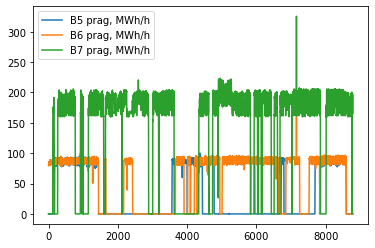

In [19]:
file_KA_2020[['B5 prag, MWh/h','B6 prag, MWh/h','B7 prag, MWh/h']].plot()

In [20]:
file_KA_2020.columns

Index(['Unnamed: 0', 'sat', 'B5 generator', 'B5 prag, MWh/h', 'B5 Q,(MVArh/h)',
       'B5 U,(kV)', 'B6 generator', 'B6 prag, MWh/h', 'B6 Q,(MVArh/h)',
       'B6 U,(kV)', 'B7 generator', 'B7 prag, MWh/h', 'B7 Q,(MVArh/h)',
       'B7 U,(kV)', 'Vl.potr P, MWh/h', 'Vl.potr Q,(MVArh/h)',
       'TE_KA generator', 'TE_KA prag, MWh/h', 'TE_KA Q * (MVArh/h)'],
      dtype='object')

<AxesSubplot:>

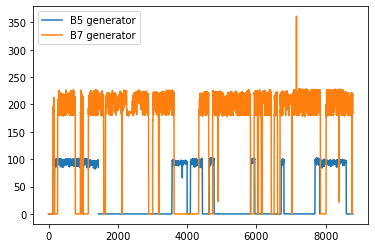

In [21]:
file_KA_2020[['B5 generator','B6 generator', 'B7 generator']].plot()

In [22]:
file_TZ_2020.columns

Index(['Unnamed: 0', 'sat', 'B3 generator', 'B3 prag, MWh/h', 'B3 Q,(MVArh/h)',
       'B4 generator', 'B4 prag, MWh/h', 'B4 Q,(MVArh/h)', 'B5 generator',
       'B5 prag, MWh/h', 'B5 Q,(MVArh/h)', 'B6 generator', 'B6 prag, MWh/h',
       'B6 Q,(MVArh/h)', 'TE_TZ generator', 'TE_TZ prag, MWh/h',
       'Q prag,(MVArh/h)', 'Q gen,(MVArh/h)', '110kV-kV'],
      dtype='object')

In [23]:
file_KA_2020["Q_KA, (MVArh/h)"]=file_KA_2020['B6 Q,(MVArh/h)']+file_KA_2020['B7 Q,(MVArh/h)']+file_KA_2020['B7 Q,(MVArh/h)']
file_KA_2019["Q_KA, (MVArh/h)"]=file_KA_2019['B6 Q,(MVArh/h)']+file_KA_2019['B7 Q,(MVArh/h)']+file_KA_2019['B7 Q,(MVArh/h)']


file_TZ_2020["Q_TZ, (MVArh/h)"]=file_TZ_2020['B3 Q,(MVArh/h)']+file_TZ_2020['B4 Q,(MVArh/h)']+file_TZ_2020['B5 Q,(MVArh/h)']+file_TZ_2020['B6 Q,(MVArh/h)']
file_TZ_2019["Q_TZ, (MVArh/h)"]=file_TZ_2019['B3 Q,(MVArh/h)']+file_TZ_2019['B4 Q,(MVArh/h)']+file_TZ_2019['B5 Q,(MVArh/h)']+file_TZ_2019['B6 Q,(MVArh/h)']


<AxesSubplot:>

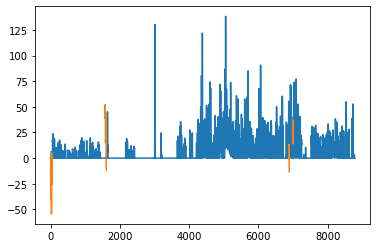

In [24]:
file_KA_2020["Q_KA, (MVArh/h)"].plot()
file_TZ_2020["Q_TZ, (MVArh/h)"].plot()

<AxesSubplot:>

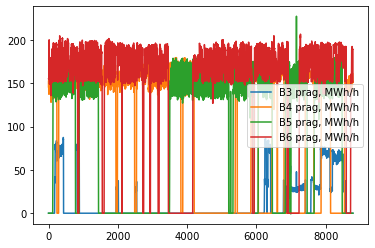

In [25]:
file_TZ_2020[['B3 prag, MWh/h','B4 prag, MWh/h','B5 prag, MWh/h','B6 prag, MWh/h']].plot()

<AxesSubplot:>

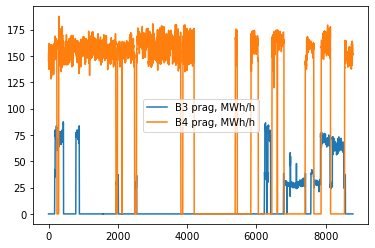

In [26]:
file_TZ_2020[['B3 prag, MWh/h','B4 prag, MWh/h']].plot()

<AxesSubplot:>

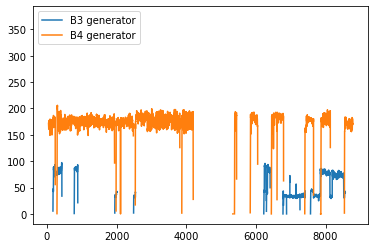

In [27]:
file_TZ_2020[['B3 generator','B4 generator']].plot()

In [28]:
file_2019["chp blocks"]=file_TZ_2019['B3 prag, MWh/h']+file_TZ_2019['B4 prag, MWh/h']+file_KA_2019['B5 prag, MWh/h']+file_KA_2019['B6 prag, MWh/h']
file_2020["chp blocks"]=file_TZ_2020['B3 prag, MWh/h']+file_TZ_2020['B4 prag, MWh/h']+file_KA_2020['B5 prag, MWh/h']+file_KA_2020['B6 prag, MWh/h']

In [29]:
print("Proizvodnja CHP blokova - el.energija, 2019:",file_2019["chp blocks"].sum(axis=0)/1000000,"TWh/god")
print("Proizvodnja CHP blokova - el.energija, 2020:",file_2020["chp blocks"].sum(axis=0)/1000000,"TWh/god")

Proizvodnja CHP blokova - el.energija, 2019: 1.4706193878206455 TWh/god
Proizvodnja CHP blokova - el.energija, 2020: 1.7590329473939461 TWh/god


In [30]:
file_2019["chp cond blocks"]=file_TZ_2019['B5 prag, MWh/h']+file_TZ_2019['B6 prag, MWh/h']+file_KA_2019['B7 prag, MWh/h']
file_2020["chp cond blocks"]=file_TZ_2020['B5 prag, MWh/h']+file_TZ_2020['B6 prag, MWh/h']+file_KA_2020['B7 prag, MWh/h']

In [31]:
print("Proizvodnja struje  CHP elektrana - kondenzacijski blokovi, 2019: ",file_2019["chp cond blocks"].sum(axis=0)/1000000,"TWh/god")
print("Proizvodnja struje  CHP elektrana - kondenzacijski blokovi, 2020:",file_2019["chp cond blocks"].sum(axis=0)/1000000,"TWh/god")

Proizvodnja struje  CHP elektrana - kondenzacijski blokovi, 2019:  3.1128205804715097 TWh/god
Proizvodnja struje  CHP elektrana - kondenzacijski blokovi, 2020: 3.1128205804715097 TWh/god


In [32]:
file_2019["cond_PP"]=file_2019['Fossil coal  - Actual Aggregated [MW]']-file_2019["chp blocks"]
file_2020["cond_PP"]=file_2020['Fossil coal  - Actual Aggregated [MW]']-file_2020["chp blocks"]

U pojedinim slučajevima, vjerovatno kao posljedica prikupljanja podataka, ukupna proizvodnja u "Fossil coal - Actual Aggregated" je manja od proizvodnje struje u CHP blokovima. Te vrijednosti će se zamijeniti vrijednostima chp cond blocks:

In [33]:
file_2020[file_2020["cond_PP"]<=0]

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Fossil coal - Actual Aggregated [MW],Timestamp,Month,Year,chp blocks,chp cond blocks,cond_PP
182,Bosnia and Herz. (BA),08.01.2020 14:00 - 08.01.2020 15:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-01-08 14:00:00,1,2020,375.11,364.24,-375.11
627,Bosnia and Herz. (BA),27.01.2020 03:00 - 27.01.2020 04:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-01-27 03:00:00,1,2020,324.34,469.74,-324.34
962,Bosnia and Herz. (BA),10.02.2020 02:00 - 10.02.2020 03:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-02-10 02:00:00,2,2020,316.69,458.75,-316.69
1167,Bosnia and Herz. (BA),18.02.2020 15:00 - 18.02.2020 16:00 (CET),NaN,269.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,43.0,269.0,2020-02-18 15:00:00,2,2020,332.41,543.86,-63.41
1207,Bosnia and Herz. (BA),20.02.2020 07:00 - 20.02.2020 08:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-02-20 07:00:00,2,2020,345.90,564.11,-345.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,Bosnia and Herz. (BA),12.11.2020 04:00 - 12.11.2020 05:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-11-12 05:00:00,11,2020,287.58,329.69,-287.58
7590,Bosnia and Herz. (BA),12.11.2020 05:00 - 12.11.2020 06:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-11-12 06:00:00,11,2020,293.81,374.88,-293.81
7591,Bosnia and Herz. (BA),12.11.2020 06:00 - 12.11.2020 07:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-11-12 07:00:00,11,2020,290.82,392.72,-290.82
7592,Bosnia and Herz. (BA),12.11.2020 07:00 - 12.11.2020 08:00 (CET),NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,n/e,0.0,0.0,2020-11-12 08:00:00,11,2020,290.96,394.65,-290.96


In [34]:
file_2019.loc[file_2019["cond_PP"]<=0,"cond_PP"]=file_2019.loc[file_2019["cond_PP"]<=0,"chp cond blocks"]
file_2020.loc[file_2020["cond_PP"]<=0,"cond_PP"]=file_2020.loc[file_2020["cond_PP"]<=0,"chp cond blocks"]

In [35]:
print("Proizvodnja struje BiH - kondenzacijski blokovi, 2019: ",file_2019["cond_PP"].sum(axis=0)/1000000,"TWh/god")
print("Proizvodnja struje BiH - kondenzacijski blokovi, 2020:",file_2020["cond_PP"].sum(axis=0)/1000000,"TWh/god")


Proizvodnja struje BiH - kondenzacijski blokovi, 2019:  8.246476652179355 TWh/god
Proizvodnja struje BiH - kondenzacijski blokovi, 2020: 8.653433732606054 TWh/god


In [36]:
print("Proizvodnja struje BiH - kondenzacijski blokovi, maksimum u satu 2019: ",file_2019["cond_PP"].max(),"MW")
print("Proizvodnja struje BiH - kondenzacijski blokovi,  maksimum u satu 2020: ",file_2020["cond_PP"].max(),"MW")

print("Proizvodnja struje BiH - kondenzacijski blokovi, prosjek 2019: ",file_2019["cond_PP"].mean(),"MW")
print("Proizvodnja struje BiH - kondenzacijski blokovi,  prosjek 2020: ",file_2020["cond_PP"].mean(),"MW")

print("Proizvodnja struje BiH - kondenzacijski blokovi, minimum 2019: ",file_2019["cond_PP"].min(),"MW")
print("Proizvodnja struje BiH - kondenzacijski blokovi, minimum  2020: ",file_2020["cond_PP"].min(),"MW")

Proizvodnja struje BiH - kondenzacijski blokovi, maksimum u satu 2019:  5059.1 MW
Proizvodnja struje BiH - kondenzacijski blokovi,  maksimum u satu 2020:  3666.78 MW
Proizvodnja struje BiH - kondenzacijski blokovi, prosjek 2019:  944.2890933447114 MW
Proizvodnja struje BiH - kondenzacijski blokovi,  prosjek 2020:  996.9393701159031 MW
Proizvodnja struje BiH - kondenzacijski blokovi, minimum 2019:  0.8599999999999994 MW
Proizvodnja struje BiH - kondenzacijski blokovi, minimum  2020:  0.0 MW


In [37]:
print("Proizvodnja struje BiH - kondenzacijski blokovi, maksimum u satu 2019: ",file_2019["chp blocks"].max(),"MW")
print("Proizvodnja struje BiH - kondenzacijski blokovi,  maksimum u satu 2020: ",file_2020["chp blocks"].max(),"MW")

print("Proizvodnja struje BiH - kondenzacijski blokovi, prosjek 2019: ",file_2019["chp blocks"].mean(),"MW")
print("Proizvodnja struje BiH - kondenzacijski blokovi,  prosjek 2020: ",file_2020["chp blocks"].mean(),"MW")

print("Proizvodnja struje BiH - kondenzacijski blokovi, minimum 2019: ",file_2019["chp blocks"].min(),"MW")
print("Proizvodnja struje BiH - kondenzacijski blokovi, minimum  2020: ",file_2020["chp blocks"].min(),"MW")

Proizvodnja struje BiH - kondenzacijski blokovi, maksimum u satu 2019:  417.5 MW
Proizvodnja struje BiH - kondenzacijski blokovi,  maksimum u satu 2020:  433.02000000000004 MW
Proizvodnja struje BiH - kondenzacijski blokovi, prosjek 2019:  168.39796035962954 MW
Proizvodnja struje BiH - kondenzacijski blokovi,  prosjek 2020:  202.65356536796563 MW
Proizvodnja struje BiH - kondenzacijski blokovi, minimum 2019:  0.0 MW
Proizvodnja struje BiH - kondenzacijski blokovi, minimum  2020:  0.0 MW


In [38]:
file_2019.loc[file_2019['Fossil coal  - Actual Aggregated [MW]']<=0,"Fossil coal  - Actual Aggregated [MW]"]=file_TZ_2019.loc[file_2019[file_2019['Fossil coal  - Actual Aggregated [MW]']<=0].index,"TE_TZ prag, MWh/h"]+file_KA_2019.loc[file_2019[file_2019['Fossil coal  - Actual Aggregated [MW]']<=0].index,"TE_KA prag, MWh/h"]
file_2020.loc[file_2020['Fossil coal  - Actual Aggregated [MW]']<=0,"Fossil coal  - Actual Aggregated [MW]"]=file_TZ_2020.loc[file_2019[file_2019['Fossil coal  - Actual Aggregated [MW]']<=0].index,"TE_TZ prag, MWh/h"]+file_KA_2020.loc[file_2020[file_2020['Fossil coal  - Actual Aggregated [MW]']<=0].index,"TE_KA prag, MWh/h"]

In [39]:
file_2019[file_2019['Fossil Hard coal  - Actual Aggregated [MW]']>2000]

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Fossil coal - Actual Aggregated [MW],Timestamp,Month,Year,chp blocks,chp cond blocks,cond_PP
7177,Bosnia and Herz. (BA),27.10.2019 01:00 - 27.10.2019 02:00 (CET),NaN,1362.0,NaN,NaN,3812.0,NaN,NaN,NaN,...,NaN,n/e,0.0,5174.0,2019-10-27 01:00:00,10,2019,114.9,168.92,5059.1


In [40]:
file_2020[file_2020['Fossil coal  - Actual Aggregated [MW]']>2000]

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Fossil coal - Actual Aggregated [MW],Timestamp,Month,Year,chp blocks,chp cond blocks,cond_PP
305,Bosnia and Herz. (BA),13.01.2020 17:00 - 13.01.2020 18:00 (CET),NaN,553.0,NaN,NaN,1454.0,NaN,NaN,NaN,...,NaN,n/e,1.0,2007.0,2020-01-13 17:00:00,1,2020,421.33,563.68,1585.67
374,Bosnia and Herz. (BA),16.01.2020 14:00 - 16.01.2020 15:00 (CET),NaN,277.0,NaN,NaN,1769.0,NaN,NaN,NaN,...,NaN,n/e,30.0,2046.0,2020-01-16 14:00:00,1,2020,411.36,517.97,1634.64
498,Bosnia and Herz. (BA),21.01.2020 18:00 - 21.01.2020 19:00 (CET),NaN,277.0,NaN,NaN,1727.0,NaN,NaN,NaN,...,NaN,n/e,1.0,2004.0,2020-01-21 18:00:00,1,2020,335.47,575.35,1668.53
1363,Bosnia and Herz. (BA),26.02.2020 19:00 - 26.02.2020 20:00 (CET),NaN,545.0,NaN,NaN,1490.0,NaN,NaN,NaN,...,NaN,n/e,31.0,2035.0,2020-02-26 19:00:00,2,2020,333.37,542.11,1701.63
1634,Bosnia and Herz. (BA),09.03.2020 02:00 - 09.03.2020 03:00 (CET),NaN,812.0,NaN,NaN,2926.0,NaN,NaN,NaN,...,NaN,n/e,40.0,3738.0,2020-03-09 02:00:00,3,2020,246.99,187.57,3491.01
1802,Bosnia and Herz. (BA),16.03.2020 02:00 - 16.03.2020 03:00 (CET),NaN,818.0,NaN,NaN,2746.0,NaN,NaN,NaN,...,NaN,n/e,12.0,3564.0,2020-03-16 02:00:00,3,2020,144.79,311.59,3419.21
2138,Bosnia and Herz. (BA),30.03.2020 02:00 - 30.03.2020 03:00 (CET),NaN,817.0,NaN,NaN,2867.0,NaN,NaN,NaN,...,NaN,n/e,24.0,3684.0,2020-03-30 02:00:00,3,2020,153.52,341.69,3530.48
2306,Bosnia and Herz. (BA),06.04.2020 02:00 - 06.04.2020 03:00 (CET),NaN,812.0,NaN,NaN,2913.0,NaN,NaN,NaN,...,NaN,n/e,120.0,3725.0,2020-04-06 02:00:00,4,2020,233.37,314.04,3491.63
3391,Bosnia and Herz. (BA),21.05.2020 07:00 - 21.05.2020 08:00 (CET),NaN,541.0,NaN,NaN,1835.0,NaN,NaN,NaN,...,NaN,n/e,101.0,2376.0,2020-05-21 07:00:00,5,2020,153.72,346.39,2222.28
3392,Bosnia and Herz. (BA),21.05.2020 08:00 - 21.05.2020 09:00 (CET),NaN,541.0,NaN,NaN,1867.0,NaN,NaN,NaN,...,NaN,n/e,100.0,2408.0,2020-05-21 08:00:00,5,2020,152.49,373.82,2255.51


In [61]:
file_2020['Fossil coal  - Actual Aggregated [MW]'].min()

2.0

In [62]:
file_2019[file_2019['Fossil coal  - Actual Aggregated [MW]']==0]

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Fossil coal - Actual Aggregated [MW],Timestamp,Month,Year,chp blocks,chp cond blocks,cond_PP,Hydro - Actual Aggregated [MW]


# Hidroelektrane

In [41]:
file_2019.columns

Index(['Area', 'MTU', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual 

<AxesSubplot:>

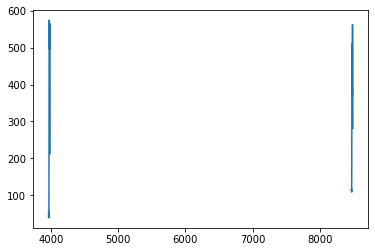

In [42]:
file_2019["Hydro Run-of-river and poundage  - Actual Aggregated [MW]"].plot()

<AxesSubplot:>

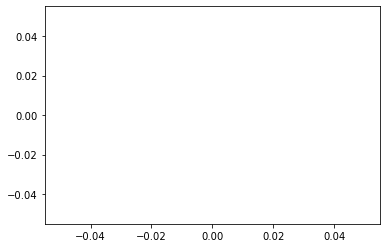

In [43]:
file_2019["Hydro Pumped Storage  - Actual Consumption [MW]"].plot()

<AxesSubplot:>

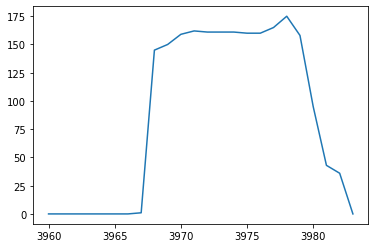

In [44]:
file_2019['Hydro Pumped Storage  - Actual Aggregated [MW]'].plot()

<AxesSubplot:>

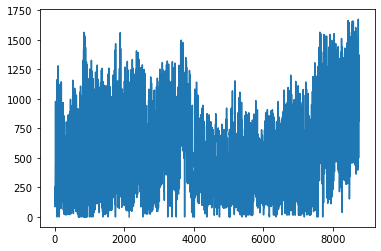

In [45]:
file_2019['Hydro Water Reservoir  - Actual Aggregated [MW]'].plot()

In [47]:
print(file_2019['Hydro Pumped Storage  - Actual Aggregated [MW]'].sum(axis=0)/1000000)
print(file_2020['Hydro Pumped Storage  - Actual Aggregated [MW]'].sum(axis=0)/1000000)
print(file_2021['Hydro Pumped Storage  - Actual Aggregated [MW]'].sum(axis=0)/1000000)

0.002092
0.0
0.220373


In [55]:
file_2019['Hydro  - Actual Aggregated [MW]']=file_2019['Hydro Water Reservoir  - Actual Aggregated [MW]'].fillna(0)+file_2019['Hydro Pumped Storage  - Actual Aggregated [MW]'].fillna(0)
file_2020['Hydro  - Actual Aggregated [MW]']=file_2020['Hydro Water Reservoir  - Actual Aggregated [MW]'].fillna(0)+file_2020['Hydro Pumped Storage  - Actual Aggregated [MW]'].fillna(0)
file_2021['Hydro  - Actual Aggregated [MW]']=file_2021['Hydro Water Reservoir  - Actual Aggregated [MW]'].fillna(0)+file_2021['Hydro Pumped Storage  - Actual Aggregated [MW]'].fillna(0)

In [56]:
names=['Fossil coal  - Actual Aggregated [MW]','Hydro  - Actual Aggregated [MW]']
print("Maksimum proizvodnje iz TE - 2019. ",file_2019[names[0]].max(axis=0),"MW")
print("Maksimum proizvodnje iz TE - 2020. ",file_2020[names[0]].max(axis=0),"MW")
print("Maksimum proizvodnje iz TE - 2021. ",file_2021[names[0]].max(axis=0),"MW")

print("Maksimum proizvodnje iz HE - 2019. ",file_2019[names[1]].max(axis=0),"MW")
print("Maksimum proizvodnje iz HE - 2020. ",file_2020[names[1]].max(axis=0),"MW")
print("Maksimum proizvodnje iz HE - 2021. ",file_2021[names[1]].max(axis=0),"MW")



Maksimum proizvodnje iz TE - 2019.  5174.0 MW
Maksimum proizvodnje iz TE - 2020.  3748.0 MW
Maksimum proizvodnje iz TE - 2021.  3426.0 MW
Maksimum proizvodnje iz HE - 2019.  1675.0 MW
Maksimum proizvodnje iz HE - 2020.  1643.0 MW
Maksimum proizvodnje iz HE - 2021.  2137.0 MW


In [57]:
file_total=pd.concat([file_2019[["Year","Month",names[0],names[1]]],file_2020[["Year","Month",names[0],names[1]]],file_2021[["Year","Month",names[0],names[1]]]],axis=0)

In [58]:
file_total.head(2)

,Year,Month,Fossil coal - Actual Aggregated [MW],Hydro - Actual Aggregated [MW]
0,2019,1,568.0,252.0
1,2019,1,547.0,183.0


<AxesSubplot:xlabel='Year'>

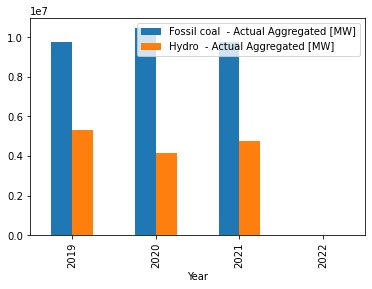

In [59]:
file_total.groupby("Year")[['Fossil coal  - Actual Aggregated [MW]','Hydro  - Actual Aggregated [MW]']].sum().plot(kind="bar")


Text(0.5, 1.0, 'Proizvodnja 2021.')

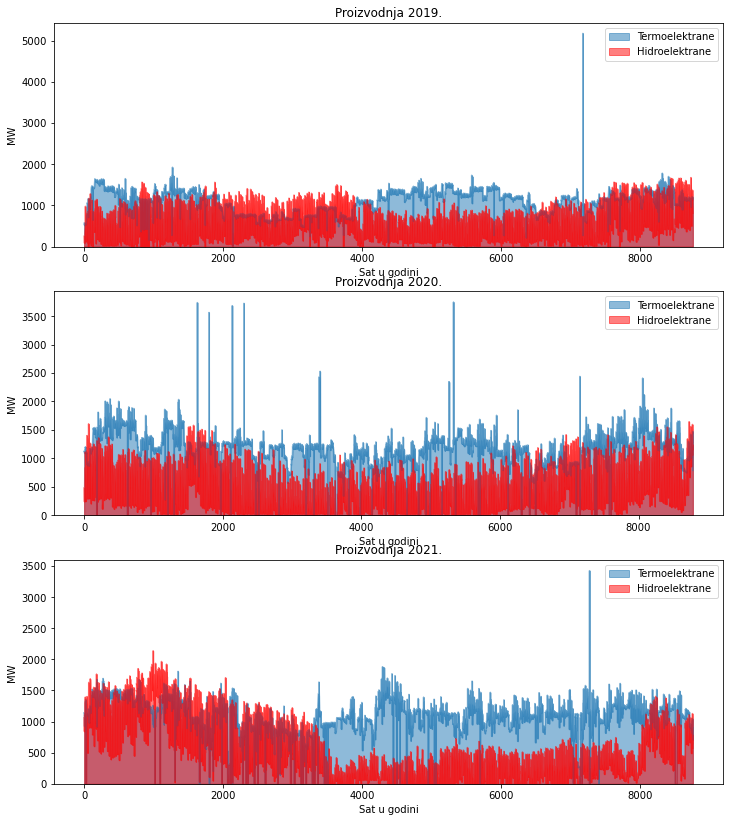

In [60]:
fig,ax=plt.subplots(nrows=3,figsize=(12,14))
file_2019['Fossil coal  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,label="Termoelektrane",ax=ax[0])
file_2019['Hydro  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,color="red",label="Hidroelektrane",ax=ax[0])
ax[0].legend()
ax[0].set_xlabel("Sat u godini")
ax[0].set_ylabel("MW")
ax[0].set_title("Proizvodnja 2019.")

file_2020['Fossil coal  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,label="Termoelektrane",ax=ax[1])
file_2020['Hydro  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,color="red",label="Hidroelektrane",ax=ax[1])
ax[1].legend()
ax[1].set_xlabel("Sat u godini")
ax[1].set_ylabel("MW")
ax[1].set_title("Proizvodnja 2020.")

file_2021['Fossil coal  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,label="Termoelektrane",ax=ax[2])
file_2021['Hydro  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,color="red",label="Hidroelektrane",ax=ax[2])
ax[2].legend()
ax[2].set_xlabel("Sat u godini")
ax[2].set_ylabel("MW")
ax[2].set_title("Proizvodnja 2021.")

Text(0.5, 1.0, 'Mjesečna proizvodnja')

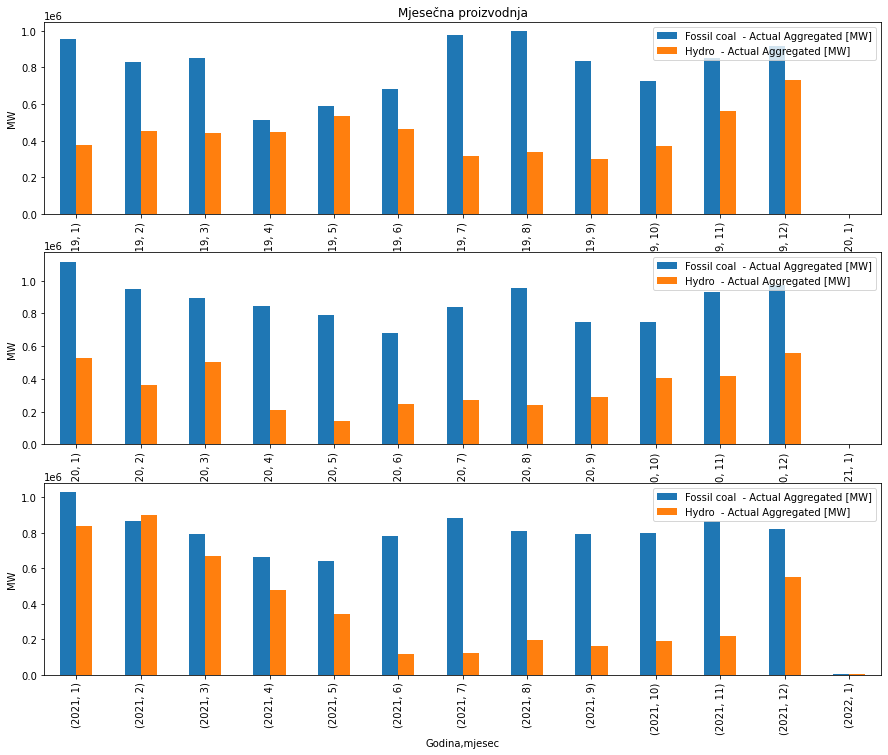

In [63]:
fig,ax=plt.subplots(nrows=3)
file_2019.groupby(["Year","Month"])[['Fossil coal  - Actual Aggregated [MW]','Hydro  - Actual Aggregated [MW]']].sum().plot(kind="bar",figsize=(15,12),ax=ax[0])
file_2020.groupby(["Year","Month"])[['Fossil coal  - Actual Aggregated [MW]','Hydro  - Actual Aggregated [MW]']].sum().plot(kind="bar",figsize=(15,12),ax=ax[1])
file_2021.groupby(["Year","Month"])[['Fossil coal  - Actual Aggregated [MW]','Hydro  - Actual Aggregated [MW]']].sum().plot(kind="bar",figsize=(15,12),ax=ax[2])
for k in range(len(ax)):
    ax[k].set_xlabel("Godina,mjesec")
    ax[k].set_ylabel("MW")
ax[0].set_title("Mjesečna proizvodnja")

In [64]:
len(file_2019[file_2019['Hydro  - Actual Aggregated [MW]']>file_2019['Fossil coal  - Actual Aggregated [MW]']]["Month"])

1466

In [65]:
len(file_2020[file_2020['Hydro  - Actual Aggregated [MW]']>file_2020['Fossil coal  - Actual Aggregated [MW]']]["Month"])

364

In [66]:
len(file_2021[file_2021['Hydro  - Actual Aggregated [MW]']>file_2021['Fossil coal  - Actual Aggregated [MW]']]["Month"])

1178

In [67]:
print("Proizvodnja struje BiH - HE, maksimum u satu 2019: ",file_2019['Hydro Water Reservoir  - Actual Aggregated [MW]'].max(),"MW")
print("Proizvodnja struje BiH - HE,  maksimum u satu 2020: ",file_2020['Hydro Water Reservoir  - Actual Aggregated [MW]'].max(),"MW")

print("Proizvodnja struje BiH - HE, prosjek 2019: ",file_2019['Hydro Water Reservoir  - Actual Aggregated [MW]'].mean(),"MW")
print("Proizvodnja struje BiH - HE,  prosjek 2020: ",file_2020['Hydro Water Reservoir  - Actual Aggregated [MW]'].mean(),"MW")

print("Proizvodnja struje BiH - HE, minimum 2019: ",file_2019['Hydro Water Reservoir  - Actual Aggregated [MW]'].min(),"MW")
print("Proizvodnja struje BiH -HE, minimum  2020: ",file_2020['Hydro Water Reservoir  - Actual Aggregated [MW]'].min(),"MW")

Proizvodnja struje BiH - HE, maksimum u satu 2019:  1675.0 MW
Proizvodnja struje BiH - HE,  maksimum u satu 2020:  1643.0 MW
Proizvodnja struje BiH - HE, prosjek 2019:  609.3431506849315 MW
Proizvodnja struje BiH - HE,  prosjek 2020:  476.54767614479846 MW
Proizvodnja struje BiH - HE, minimum 2019:  0.0 MW
Proizvodnja struje BiH -HE, minimum  2020:  0.0 MW


# Podaci za EnergyPLAN

Spisak termoelektrana dat je na slici: 
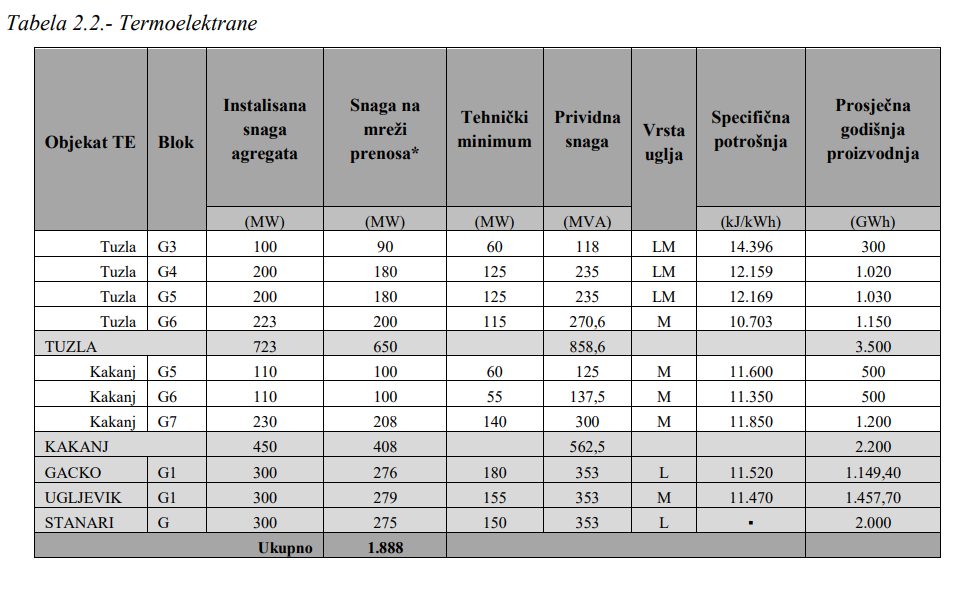

Na ovaj iznos će se dodati i još 2,11 MW od kojih se proizvodi električna energija u industrijskim energanama. 

In [68]:
print("Ukupna proizvodnja iz TE, 2019",file_2019['Fossil coal  - Actual Aggregated [MW]'].sum(axis=0)/1000,"GWh")
print("Ukupna proizvodnja iz TE, 2020",file_2020['Fossil coal  - Actual Aggregated [MW]'].sum(axis=0)/1000,"GWh")
print("Ukupna proizvodnja iz TE, 2021",file_2021['Fossil coal  - Actual Aggregated [MW]'].sum(axis=0)/1000,"GWh")

Ukupna proizvodnja iz TE, 2019 9736.1102 GWh
Ukupna proizvodnja iz TE, 2020 10455.695 GWh
Ukupna proizvodnja iz TE, 2021 9736.054 GWh


Stepen termalne i električne efikasnosti će se preuzeti iz energetskog bilansa.

In [69]:
print("Snaga kondenzacijskih elektrana:",1888-1058+2.11,"MW")

Snaga kondenzacijskih elektrana: 832.11 MW


Stepen iskorištenja kondenzacijskih elektrana će se procijeniti na osnovu potrošnje uglja i proizvedene električne energije:

In [70]:
HD=11884 #kj/kg
#Bilans RS ZA 2020. godinu: potrošnja uglja 6895783 t
st_gac_ugljev=6895783*1000*HD/(3600*1000000)
print("TE - kondenzacijske - potrošnja energije uglja, RS, 2020:",st_gac_ugljev,"GWh")
print("TE - kondenzacijske - potrošnja energije uglja, RS, 2020:",st_gac_ugljev/1000,"TWh")
#proizvedena el.energija za 2020. NOS BiH:
st_gac_ugljev_prod=1648+1638+2002#GWH
print("\nTE - kondenzacijske, RS, proizvodnja el. energije 2020:",st_gac_ugljev_prod,"GWh")

print("stepen iskorištenja",st_gac_ugljev_prod/st_gac_ugljev)


HD=11884 #kj/kg
#Bilans FBIH ZA 2020. godinu: potrošnja uglja 6895783 t
tuzl_ka=5325868*1000*HD/(3600*1000000)
print("TE - kondenzacijske - potrošnja energije uglja, TE Kakanj i TE Tuzla, 2020:",tuzl_ka,"GWh")
#proizvedena el.energija za 2020. NOS BiH:
tuzl_ka_prod=2975+2099#GWH
print("\nTE - kondenzacijske, TE Kakanj i TE Tuzla, proizvodnja el. energije 2020:",tuzl_ka_prod,"GWh")


chp_el=756/3600
print("Procijenjena proizvedena el. energija u CHP modu, cca.",chp_el*1000,"GWh")
cond=tuzl_ka_prod-chp_el*1000
print("Procijenjena proizvedena el. energija u CHP - kondenzacijski mod, cca.",cond,"GWh")
coal_chp=3393.0*1000/3600
print("Procijenjena potrošnja uglja u CHP, cca.",coal_chp)
cond_eff=cond/(tuzl_ka-coal_chp)
print("TE - kondenzacijske- stepen iskorištenja",cond_eff)
print("Procijenjena potrošnja uglja u kond modu, cca.",(tuzl_ka-coal_chp)/1000,"TWh")

TE - kondenzacijske - potrošnja energije uglja, RS, 2020: 22763.74588111111 GWh
TE - kondenzacijske - potrošnja energije uglja, RS, 2020: 22.76374588111111 TWh

TE - kondenzacijske, RS, proizvodnja el. energije 2020: 5288 GWh
stepen iskorištenja 0.23229920188082376
TE - kondenzacijske - potrošnja energije uglja, TE Kakanj i TE Tuzla, 2020: 17581.28203111111 GWh

TE - kondenzacijske, TE Kakanj i TE Tuzla, proizvodnja el. energije 2020: 5074 GWh
Procijenjena proizvedena el. energija u CHP modu, cca. 210.0 GWh
Procijenjena proizvedena el. energija u CHP - kondenzacijski mod, cca. 4864.0 GWh
Procijenjena potrošnja uglja u CHP, cca. 942.5
TE - kondenzacijske- stepen iskorištenja 0.2923290894072245
Procijenjena potrošnja uglja u kond modu, cca. 16.63878203111111 TWh


In [71]:
file_2019['Fossil coal  - Actual Aggregated [MW]'].fillna(method='backfill', axis=0,inplace=True)
file_2020['Fossil coal  - Actual Aggregated [MW]'].fillna(method='backfill', axis=0,inplace=True)
file_2021['Fossil coal  - Actual Aggregated [MW]'].fillna(method='backfill', axis=0,inplace=True)


In [72]:
zeros = pd.DataFrame(0, index=np.arange(23), columns=file_2019.columns)
file_2019= pd.concat([file_2019, zeros])
file_2021= pd.concat([file_2021, zeros])

In [73]:
pd.to_numeric(file_2019['Fossil coal  - Actual Aggregated [MW]']).astype(float).to_csv(r'EnergyPLAN files\Supply\Powerplants\powerplantsBH_2019.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(file_2020['Fossil coal  - Actual Aggregated [MW]']).astype(float).to_csv(r'EnergyPLAN files\Supply\Powerplants\powerplantsBH_2020.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(file_2021['Fossil coal  - Actual Aggregated [MW]']).astype(float).to_csv(r'EnergyPLAN files\Supply\Powerplants\powerplantsBH_2021.txt', index=False,header=0,decimal=",",sep=" ")

Kondenzacijski mod:

In [74]:
pd.to_numeric(file_2019['cond_PP']).astype(float).to_csv(r'EnergyPLAN files\Supply\Powerplants\condpowerplantsBH_2019.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(file_2020['cond_PP']).astype(float).to_csv(r'EnergyPLAN files\Supply\Powerplants\condpowerplantsBH_2020.txt', index=False,header=0,decimal=",",sep=" ")
#pd.to_numeric(file_2021['cond_PP']).astype(float).to_csv(r'EnergyPLAN files\Supply\Powerplants\condpowerplantsBH_2021.txt', index=False,header=0,decimal=",",sep=" ")

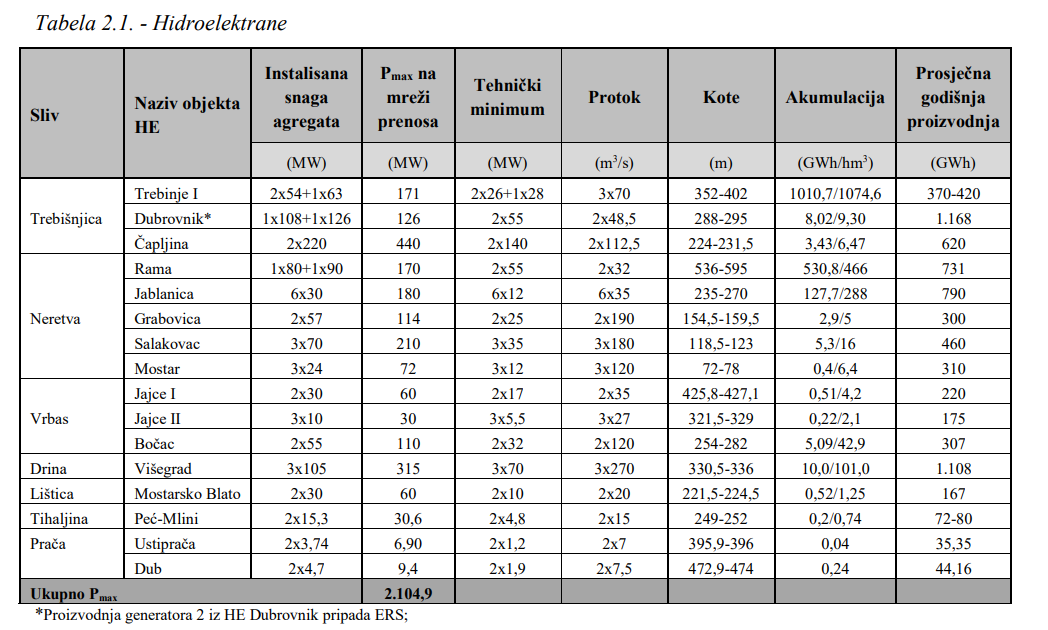

Dotok vode ("Dammed hydro water supply") je u TWh/god dobiven na stepena iskorištenja i ukupne godišnje proizvodnje

In [75]:
eta=0.92*0.92*0.97*0.99 #eta tok *eta turb*etameh*etatran
print(eta)

0.8127979200000001


In [76]:
print("Ukupna proizvodnja iz HE, 2019",file_2019['Hydro  - Actual Aggregated [MW]'].sum(axis=0)/1000,"GWh")
print("Ukupna proizvodnja iz HE, 2020",file_2020['Hydro  - Actual Aggregated [MW]'].sum(axis=0)/1000,"GWh")
print("Ukupna proizvodnja iz HE, 2021",file_2021['Hydro  - Actual Aggregated [MW]'].sum(axis=0)/1000,"GWh")

Ukupna proizvodnja iz HE, 2019 5339.938 GWh
Ukupna proizvodnja iz HE, 2020 4173.128 GWh
Ukupna proizvodnja iz HE, 2021 4777.953 GWh


In [77]:
supply=(file_2020['Hydro  - Actual Aggregated [MW]'].sum(axis=0)/1000000)/eta
supply#TWh/god

5.13427494991621

In [78]:
file_2019["Hydro Water Reservoir  - Actual Aggregated [MW]"].fillna(0, axis=0,inplace=True)
file_2020["Hydro Water Reservoir  - Actual Aggregated [MW]"].fillna(0, axis=0,inplace=True)
file_2021["Hydro Water Reservoir  - Actual Aggregated [MW]"].fillna(0, axis=0,inplace=True)

In [79]:
pd.to_numeric(file_2019['Hydro  - Actual Aggregated [MW]']).astype(float).to_csv(r'EnergyPLAN files\Supply\Hydro\hydroBH_2019.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(file_2020['Hydro  - Actual Aggregated [MW]']).astype(float).to_csv(r'EnergyPLAN files\Supply\Hydro\hydroBH_2020.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(file_2021['Hydro  - Actual Aggregated [MW]']).astype(float).to_csv(r'EnergyPLAN files\Supply\Hydro\hydroBH_2021.txt', index=False,header=0,decimal=",",sep=" ")

In [82]:
file_2020.groupby("Month")["Hydro Water Reservoir  - Actual Aggregated [MW]"].sum()/744

Month
1     713.744624
2     484.372312
3     675.965054
4     283.299731
5     191.995968
6     327.301075
7     365.041667
8     322.540323
9     386.041667
10    544.915323
11    562.676075
12    751.149194
Name: Hydro Water Reservoir  - Actual Aggregated [MW], dtype: float64